In [23]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import tensorflow_text as text  # Registers the ops.
import tensorflow_hub as hub
import matplotlib.pyplot as plt

# Dataset Loading

#### Loading the datasets from the direct path is important orelse it threw me an error if I downloaded the kaggle datasets and then used them here.

In [24]:
train_essay = pd.read_csv(r"D:\Downloads\LLM-Text-Detection-main\Actual-Datasets\train_essays.csv")
train_essay

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


In [25]:
test_essay = pd.read_csv(r"D:\Downloads\LLM-Text-Detection-main\Actual-Datasets\test_essays.csv")
test_essay

,id,prompt_id,text
0,0000aaaa,2,"As the moon peeked through the clouds, casting..."
1,1111bbbb,3,I have a friend who hangs with us everyday he ...
2,2222cccc,4,The aroma of freshly baked bread wafted from t...


In [26]:
sample_sub = pd.read_csv(r"D:\Downloads\LLM-Text-Detection-main\Actual-Datasets\test_essays.csv")
sample_sub

,id,prompt_id,text
0,0000aaaa,2,"As the moon peeked through the clouds, casting..."
1,1111bbbb,3,I have a friend who hangs with us everyday he ...
2,2222cccc,4,The aroma of freshly baked bread wafted from t...


# Data Analysis and Visualization

In [27]:
train_essay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB


In [28]:
train_essay['prompt_id'].value_counts()

prompt_id
0    708
1    670
Name: count, dtype: int64

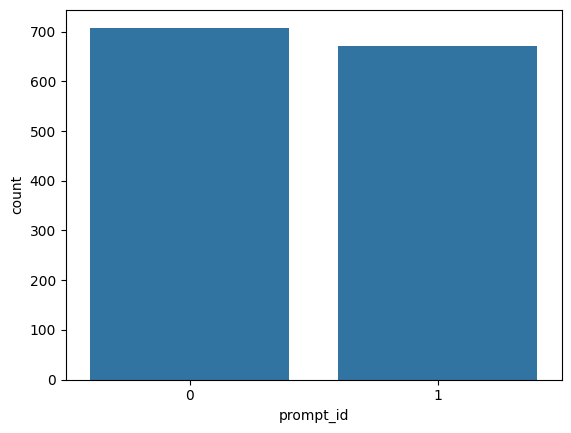

In [29]:
sns.countplot(x=train_essay['prompt_id'])
plt.show()

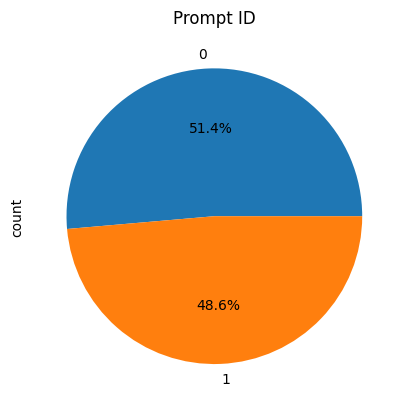

In [30]:
train_essay['prompt_id'].value_counts().plot(kind="pie",autopct="%.1f%%")
plt.title("Prompt ID")
plt.show()

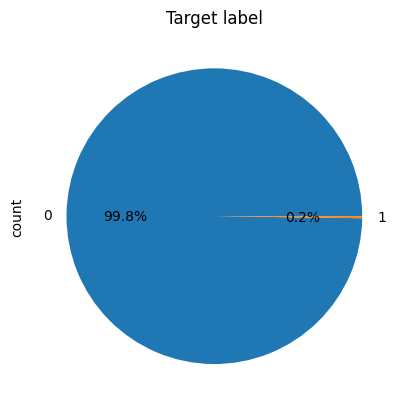

In [31]:
train_essay['generated'].value_counts().plot(kind="pie",autopct="%.1f%%") # to see what to take as base
plt.title("Target label")
plt.show()

#### We observe that wrt 'generated' the data is highly imbalanced so we would be using 'prompt_id'

In [32]:
train_essay.head()

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


In [33]:
ai_df = train_essay[train_essay['generated']==1]
ai_df

,id,prompt_id,text,generated
704,82131f68,1,"This essay will analyze, discuss and prove one...",1
740,86fe4f18,1,I strongly believe that the Electoral College ...,1
1262,eafb8a56,0,"Limiting car use causes pollution, increases c...",1


In [34]:
train_essay

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


# Data Pre-processing

### we would be using the stopwords_text and then we would be splitting them and all these words would be removed from the essays we had earlier

In [35]:
stopwords_text = """"i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't weren weren't won won't wouldn wouldn't"
"""
stopwords_list = stopwords_text.split()

In [36]:
len(stopwords_list)

176

# Using custom datasets to feed in more data

#### this was done to make the model train better with wide variety of data

In [37]:
df = pd.read_csv(r"D:\Downloads\LLM-Text-Detection-main\Extra-Datasets-Used\Training_Essay_Data.csv")

In [38]:
df

,text,generated
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1
...,...,...
29140,There has been a fuss about the Elector Colleg...,0
29141,Limiting car usage has many advantages. Such a...,0
29142,There's a new trend that has been developing f...,0
29143,As we all know cars are a big part of our soci...,0


In [39]:
df2 = pd.read_csv(r"D:\Downloads\LLM-Text-Detection-main\Extra-Datasets-Used\train_drcat_04.csv")
df2 = df2[['text','label']]
df2.columns = ['text','generated']
df2

,text,generated
0,"In recent years, technology has had a profoun...",1
1,Should students participate in an extracurricu...,0
2,The electoral college is a symbol of mockery a...,0
3,This is why I think the principle should allow...,0
4,I strongly believe that meditation and mindful...,1
...,...,...
44201,"""Oh man I didn't make the soccer team!"", yelle...",0
44202,I believe that using this technology could be ...,0
44203,The Face on Mars is a fascinating phenomenon t...,1
44204,Texting & Driving\n\nUsing your phone while dr...,0


In [40]:
#df2.drop_duplicates(inplace=True,ignore_index=True)

In [41]:
#df2

In [42]:
df3 = pd.read_csv(r"D:\Downloads\LLM-Text-Detection-main\Extra-Datasets-Used\train_essays_RDizzl3_seven_v1.csv")
df3.columns = ['text','generated']
df3

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0
...,...,...
15866,"While some find the ""Face on Mars"" imaged by t...",1
15867,Limiting car usage has many benefits for moder...,1
15868,The Rise of Driverless Cars\n\nThe development...,1
15869,The Open Sea Beckons\n\nThe Seagoing Cowboys p...,1


In [43]:
train_data = pd.concat([df3,df2,df],axis=0,ignore_index=True)
train_data

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0
...,...,...
89217,There has been a fuss about the Elector Colleg...,0
89218,Limiting car usage has many advantages. Such a...,0
89219,There's a new trend that has been developing f...,0
89220,As we all know cars are a big part of our soci...,0


In [44]:
train_data.drop_duplicates(inplace=True,ignore_index=True)

In [45]:
train_data

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0
...,...,...
65457,Today's society is ever-evolving and the role ...,1
65458,The ever-evolving world of technology has chan...,1
65459,Fostering a Rescue Dog: Gaining Unconditional ...,1
65460,The importance of a solid foundation in educat...,1


In [46]:
# Dataset
d1 = pd.read_csv(r"D:\Downloads\LLM-Text-Detection-main\Extra-Datasets-Used\falcon_180b_v1.csv")
d1

,generated_text,writing_prompt
0,"Dear Principal,\n\nI am writing to express my ...",Your principal is considering changing school ...
1,When people are faced with a difficult decisio...,"When people ask for advice, they sometimes tal..."
2,"As a grade 12 student, I believe that summer p...",Some schools require students to complete summ...
3,"Dear Principal,\n\nI am writing to share my th...",Some of your friends perform community service...
4,"""Making Mona Lisa Smile"" is an interesting art...","In the article ""Making Mona Lisa Smile,"" the a..."
...,...,...
1050,(I am not capable of personal opinions or beli...,The role of zoos in conservation and education...
1051,"In ""The Challenge of Exploring Venus,"" the aut...","In ""The Challenge of Exploring Venus,"" the aut..."
1052,"The article ""Making Mona Lisa Smile"" discusses...","In the article ""Making Mona Lisa Smile,"" the a..."
1053,"As a grade 6 student, I am still learning abou...",The issue of gun control is a highly contentio...


In [47]:
# Dataset
d2 = pd.read_csv(r"D:\Downloads\LLM-Text-Detection-main\Extra-Datasets-Used\llama_70b_v1.csv")
d2

,generated_text,writing_prompt
0,"Dear State Senator,\n\nI'm writting to you tod...",Write a letter to your state senator in which ...
1,"Uh, hi! So, like, summers are, like, awesome r...",Some schools require students to complete summ...
2,"When peoples ask for advices, they sometimes t...","When people ask for advice, they sometimes tal..."
3,I think art edukation is super impotent for ki...,Many people believe that arts education is ess...
4,I think we should totally switch to renewable ...,"In recent years, there has been a push towards..."
...,...,...
1167,Climate change is a really important issue tha...,The issue of climate change has become increas...
1168,"Introduction:\n\nDriverless cars, a technology...","In the article “Driverless Cars are Coming,” t..."
1169,Social media has become an integral part of ou...,The impact of social media on society has been...
1170,"Meat, it's something that many of us have grow...",There is a growing movement advocating for the...


In [48]:
data = pd.concat([d1,d2],axis=0,ignore_index=True)
data['generated'] = 1
data.columns = ['text','writing_prompt','generated']
data = data[['text','generated']]
data

,text,generated
0,"Dear Principal,\n\nI am writing to express my ...",1
1,When people are faced with a difficult decisio...,1
2,"As a grade 12 student, I believe that summer p...",1
3,"Dear Principal,\n\nI am writing to share my th...",1
4,"""Making Mona Lisa Smile"" is an interesting art...",1
...,...,...
2222,Climate change is a really important issue tha...,1
2223,"Introduction:\n\nDriverless cars, a technology...",1
2224,Social media has become an integral part of ou...,1
2225,"Meat, it's something that many of us have grow...",1


In [49]:
Train_Data = pd.concat([train_data,data],axis=0,ignore_index=True)
Train_Data

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0
...,...,...
67684,Climate change is a really important issue tha...,1
67685,"Introduction:\n\nDriverless cars, a technology...",1
67686,Social media has become an integral part of ou...,1
67687,"Meat, it's something that many of us have grow...",1


In [50]:
d = pd.read_csv("D:\Downloads\LLM-Text-Detection-main\Extra-Datasets-Used\LLM_generated_essay_PaLM.csv")
d

,id,prompt_id,text,generated
0,0,0.0,## The Advantages of Limiting Car Usage\n\nIn ...,1.0
1,1,0.0,"The United States is a car-dependent nation, w...",1.0
2,2,0.0,"In recent years, there has been a growing move...",1.0
3,3,0.0,"In recent years, there has been a growing move...",1.0
4,4,0.0,"In the past few decades, the United States has...",1.0
...,...,...,...,...
1379,1379,1.0,"Dear Senator,\n\nI am writing to you today to ...",1.0
1380,1380,1.0,"Dear Senator,\n\nI am writing to you today to ...",1.0
1381,1381,1.0,"Dear Senator,\n\nI am writing to you today to ...",1.0
1382,1382,1.0,"Dear Senator,\n\nI am writing to you today to ...",1.0


In [51]:
d['generated'] = d['generated'].astype(int)

In [52]:
dd = d[['text','generated']]
dd

,text,generated
0,## The Advantages of Limiting Car Usage\n\nIn ...,1
1,"The United States is a car-dependent nation, w...",1
2,"In recent years, there has been a growing move...",1
3,"In recent years, there has been a growing move...",1
4,"In the past few decades, the United States has...",1
...,...,...
1379,"Dear Senator,\n\nI am writing to you today to ...",1
1380,"Dear Senator,\n\nI am writing to you today to ...",1
1381,"Dear Senator,\n\nI am writing to you today to ...",1
1382,"Dear Senator,\n\nI am writing to you today to ...",1


In [53]:
Train_Data  =pd.concat([Train_Data,dd],axis=0,ignore_index=True)
Train_Data

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0
...,...,...
69068,"Dear Senator,\n\nI am writing to you today to ...",1
69069,"Dear Senator,\n\nI am writing to you today to ...",1
69070,"Dear Senator,\n\nI am writing to you today to ...",1
69071,"Dear Senator,\n\nI am writing to you today to ...",1


In [54]:
Train_Data.drop_duplicates(inplace=True,ignore_index=True)

In [55]:
Train_Data

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0
...,...,...
66841,"Dear Senator,\n\nI am writing to you today to ...",1
66842,"Dear Senator,\n\nI am writing to you today to ...",1
66843,"Dear Senator,\n\nI am writing to you today to ...",1
66844,"Dear Senator,\n\nI am writing to you today to ...",1


In [56]:
Train_Data['generated'].value_counts()

generated
0    41257
1    25589
Name: count, dtype: int64

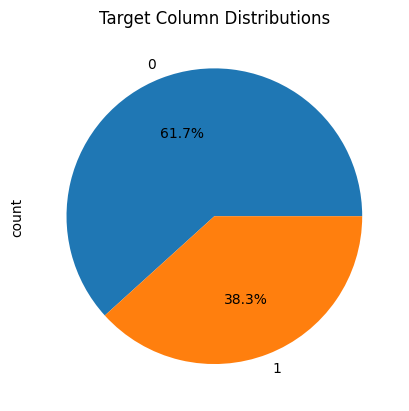

In [57]:
Train_Data.generated.value_counts().plot(kind='pie',autopct="%.1f%%")
plt.title("Target Column Distributions")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

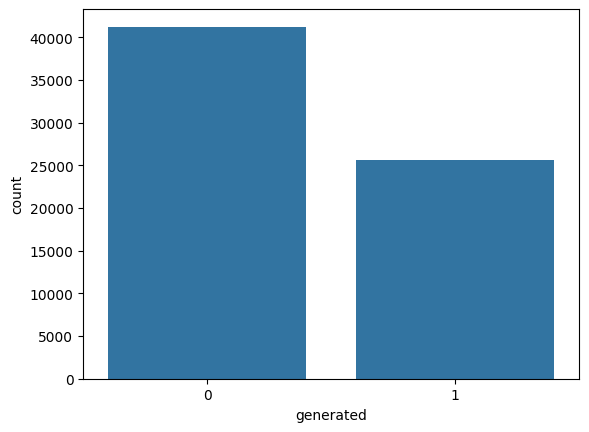

In [58]:
sns.countplot(x=Train_Data['generated'])
plt.show

# Balancing the dataset

In [59]:
# function to balance label_counts

def balance_labels(df, label_column='generated'):
    label_counts=df[label_column].value_counts()
    max_count=label_counts.max()
    
    balanced_df=pd.DataFrame()
    
    for label, count in label_counts.items():
        label_subset = df[df[label_column]==label]
        oversampled_subset= label_subset.sample(n=(max_count-count), replace=True, random_state=42)
        balanced_df = pd.concat([balanced_df, label_subset, oversampled_subset], ignore_index=True)
        
    return balanced_df


In [60]:
# Balance labels in the dataframe
Train_Data=balance_labels(Train_Data)

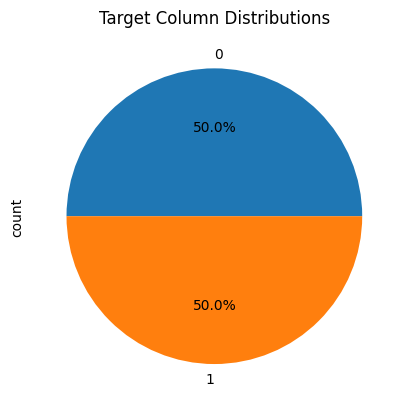

In [61]:
Train_Data.generated.value_counts().plot(kind='pie',autopct="%.1f%%")
plt.title("Target Column Distributions")
plt.show()

# Model Building

### first we would be segregating the training dataset we have into train and test datasets

In [70]:
x_train,x_test,y_train,y_test=train_test_split(Train_Data.text,Train_Data.generated,test_size=0.2,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(66011,)
(16503,)
(66011,)
(16503,)


In [41]:
x_train

53334     As a teenager, it can be tempting to try to b...
27795    Is it crazy that now there is a Facial Action ...
31737    Phones and driving\n\nDo you think it is worth...
9313     "Twenty five years ago something funny happene...
82118    In today's world, the education system is evol...
                               ...                        
50362    I believe that people should adopt a vegetaria...
20578    When you ask multiple people for advice, you a...
10937    Cars have essentially become a necessity in th...
37076    Smog. Gas. Pollution. Many countries dont allo...
75843    The idea that colleges and universities should...
Name: text, Length: 81771, dtype: object

## Using bert model for predictions

In [41]:
# Load preprocessor and model directly from TensorFlow Hub
preprocessor_url = "https://kaggle.com/models/tensorflow/albert/frameworks/TensorFlow2/variations/en-preprocess/versions/3"
model_url = "https://www.kaggle.com/models/tensorflow/albert/frameworks/TensorFlow2/variations/en-base/versions/3"

# Create text input layer
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)

# Apply preprocessing using TensorFlow Hub module
preprocessor = hub.KerasLayer(preprocessor_url)
encoder_inputs = preprocessor(text_input)

# Load BERT model from TensorFlow Hub
encoder = hub.KerasLayer(model_url, trainable=True)
outputs = encoder(encoder_inputs)

# Extract pooled and sequence outputsw
pooled_output = outputs["pooled_output"]  
sequence_output = outputs["sequence_output"]

In [43]:
# model_path ="/kaggle/input/bert/tensorflow2/bert-en-uncased-l-12-h-768-a-12/2"
# preprocess_path = "/kaggle/input/bert/tensorflow2/en-uncased-preprocess/3/"

In [44]:
# text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
# preprocessor = hub.KerasLayer(preprocess_path)
# encoder_inputs  = preprocessor(text_input) # this is basically the preprocessed text

In [45]:
# ## Use BERT Model
# encoder = hub.KerasLayer(model_path,trainable=True)
# outputs = encoder(encoder_inputs)
# pooled_output = outputs['pooled_output'] # [batch_size, 512].
# sequence_output = outputs["sequence_output"] # [batch_size, seq_length, 512].

In [42]:
dropout = tf.keras.layers.Dropout(0.51 , name="dropout1")(pooled_output)
dense_2 = tf.keras.layers.Dense(64 , activation='relu')(dropout)
dropout = tf.keras.layers.Dropout(0.3 , name="dropout2")(dense_2)

dense_out = tf.keras.layers.Dense(1 , activation='sigmoid', name='output')(dropout)

model = tf.keras.Model(inputs=text_input, outputs=dense_out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['input_1[0][0]']                
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [47]:
#model.compile(optimizer='adam', loss='binary_crossentropy',metrics=["accuracy"]) # using adam gave better results as compared to rmse
#history = model.fit(x_train, y_train , batch_size=512 , epochs=10 , validation_data=(x_test, y_test)) 
# using smaller batch size gave better predictions as it improved accuracy but the submission accuracy reduced

In [49]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6),
              loss='binary_crossentropy',
              metrics=["acc"])

checkpoint_filepath = 'checkpoint.hdf5'
metric = 'val_accuracy'
callback_list = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor=metric,
                    verbose=2, save_best_only=True, mode='max')
history = model.fit(x_train, y_train , batch_size=4, callbacks=[callback_list],epochs=1 , validation_data=(x_test, y_test))
# model.load_weights(checkpoint_filepath)
model.save("model-albert")

20443/20443 [==============================] - ETA: 0s - loss: 0.0512 - acc: 0.9862WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


20443/20443 [==============================] - 5679s 278ms/step - loss: 0.0512 - acc: 0.9862 - val_loss: 0.0313 - val_acc: 0.9906


INFO:tensorflow:Assets written to: model-albert\assets


INFO:tensorflow:Assets written to: model-albert\assets


In [50]:
loss , acc = model.evaluate(x_train, y_train)
print("Accuracy on Train data:",acc)
loss , acc = model.evaluate(x_test, y_test)
print("Accuracy on Test data:",acc)

2556/2556 [==============================] - 1691s 661ms/step - loss: 0.0180 - acc: 0.9949
Accuracy on Train data: 0.9948759078979492
24/24 [==============================] - 15s 639ms/step - loss: 0.0313 - acc: 0.9906
Accuracy on Test data: 0.9905787110328674


In [51]:
test_essay

,id,prompt_id,text
0,0000aaaa,2,"As the moon peeked through the clouds, casting..."
1,1111bbbb,3,I have a friend who hangs with us everyday he ...
2,2222cccc,4,The aroma of freshly baked bread wafted from t...


# Predictions

In [63]:
model_path = "model-albert"  # Replace with your model filename if different

model = tf.keras.models.load_model(model_path)


In [72]:
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score

# Assuming you have separate X_test and y_test for the testing data

y_pred = model.predict(x_test)  # Make predictions on the testing data

# Convert predictions to labels (if necessary)
if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:  # Check for multi-class predictions
    y_pred_label = np.argmax(y_pred, axis=1)  # Convert to predicted class labels
else:
    y_pred_label = np.array(y_pred >= 0.5, dtype=float)  # Convert to binary labels (using 0.5 threshold)

# Calculate metrics
auc = roc_auc_score(y_test, y_pred)  # For classification tasks
acc = accuracy_score(y_test, y_pred_label)
f1 = f1_score(y_test, y_pred_label)
precision = precision_score(y_test, y_pred_label)
recall = recall_score(y_test, y_pred_label)

print(f"AUC score: {auc}")
print(f"Accuracy score: {acc}")
print(f"F1 score: {f1}")
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")



516/516 [==============================] - 350s 679ms/step
AUC score: 0.9996793281911284
Accuracy score: 0.9952735866206144
F1 score: 0.9952410006101281
Precision score: 0.9993873299840705
Recall score: 0.9911289342568963


In [53]:
y_pred = model.predict(test_essay['text'])

1/1 [==============================] - 1s 829ms/step


In [54]:
y_pred

array([[0.99871314],
       [0.00881522],
       [0.9967154 ]], dtype=float32)

In [55]:
y_pred[:,0]


array([0.99871314, 0.00881522, 0.9967154 ], dtype=float32)

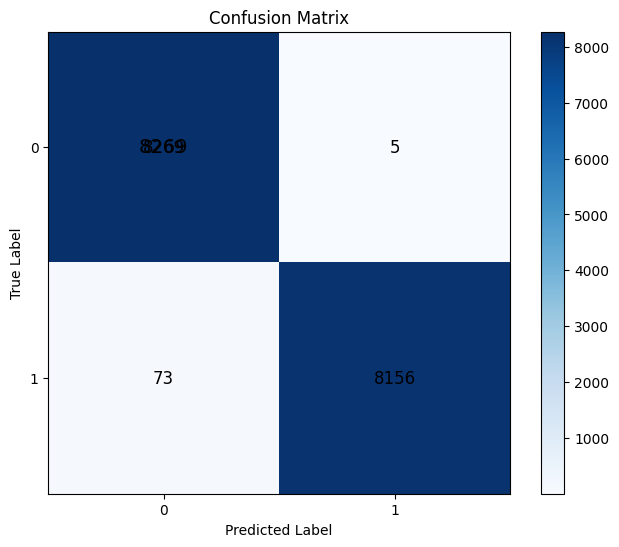

In [74]:
from sklearn.metrics import confusion_matrix
y_true = y_test
cm = confusion_matrix(y_true, y_pred_label)
# cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_true))), np.unique(y_true))
plt.yticks(np.arange(len(np.unique(y_true))), np.unique(y_true))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.text(0, 0, cm[0, 0], va='center', ha='center', color='black', fontsize=14)
# Add text for other entries in the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], va='center', ha='center', color='black', fontsize=12)
plt.grid(False)
plt.show()
